In [3]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CODSOFT /creditcard.csv")

# Preprocess Data
scaler = StandardScaler()
df[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])

X = df.drop("Class", axis=1)
y = df["Class"]


Dataset shape: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-n

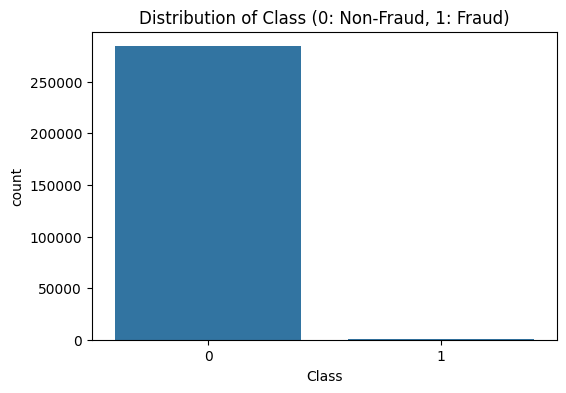

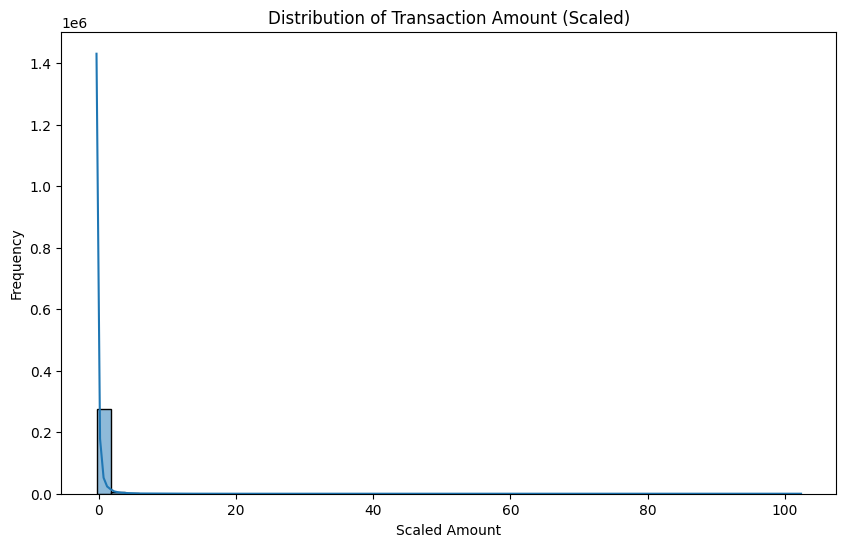

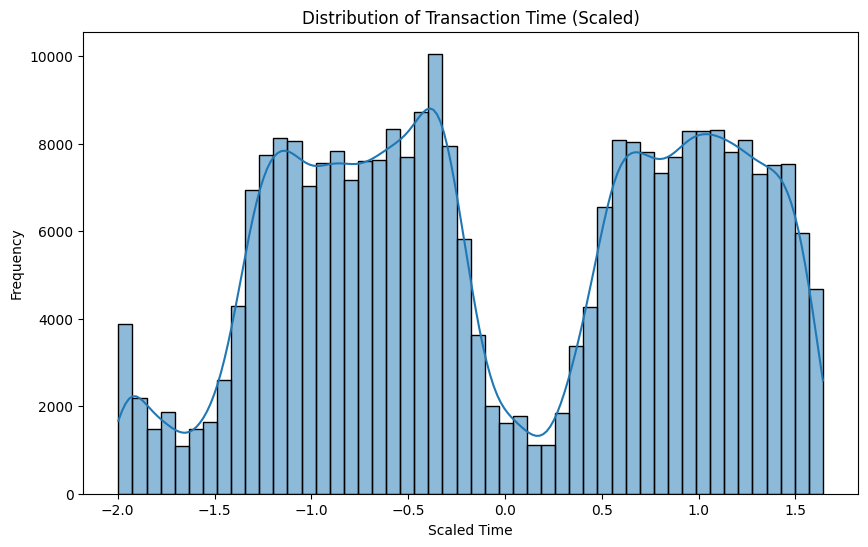

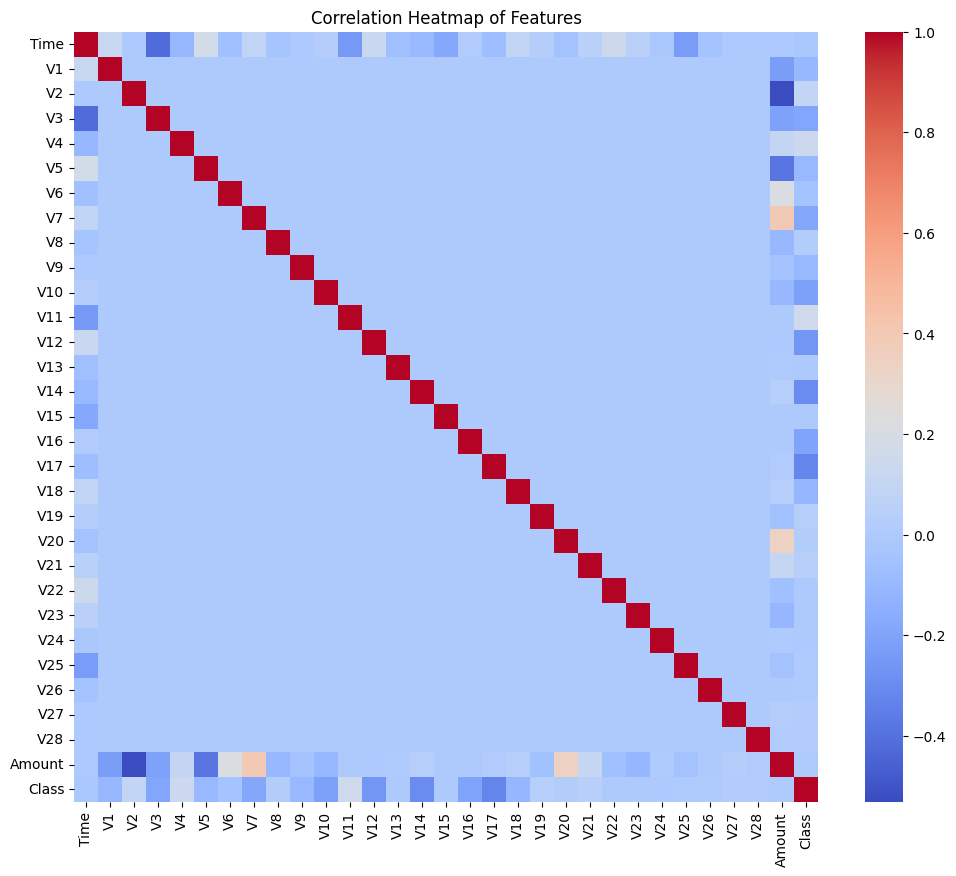


Correlation with 'Class':
 Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [10]:
# Exploratory Data Analysis
print("Dataset shape:", df.shape)
print("\nDataset info:\n", df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nDescriptive statistics:\n", df.describe())

# Distribution of 'Class'
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Class (0: Non-Fraud, 1: Fraud)')
plt.show()

# Distribution of 'Amount'
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount (Scaled)')
plt.xlabel('Scaled Amount')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'Time'
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time (Scaled)')
plt.xlabel('Scaled Time')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

# Correlation of features with 'Class'
correlation_with_class = df.corr()['Class'].sort_values(ascending=False)
print("\nCorrelation with 'Class':\n", correlation_with_class)

In [5]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [6]:
#Handle Class Imbalance using Undersampling
train_data = pd.concat([X_train, y_train], axis=1)
majority = train_data[train_data.Class == 0]
minority = train_data[train_data.Class == 1]

# Downsample majority class
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=42)
balanced_data = pd.concat([majority_downsampled, minority])

X_train_bal = balanced_data.drop("Class", axis=1)
y_train_bal = balanced_data["Class"]

In [7]:
# Train Models

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

In [8]:
#Make Predictions
rf_preds = rf_model.predict(X_test)

#Evaluate Models
print("=== Random Forest ===")
print(classification_report(y_test, rf_preds))



=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962

